In [2]:
from sklearn.datasets import load_iris

import pandas as pd

In [3]:
iris = load_iris()

In [5]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

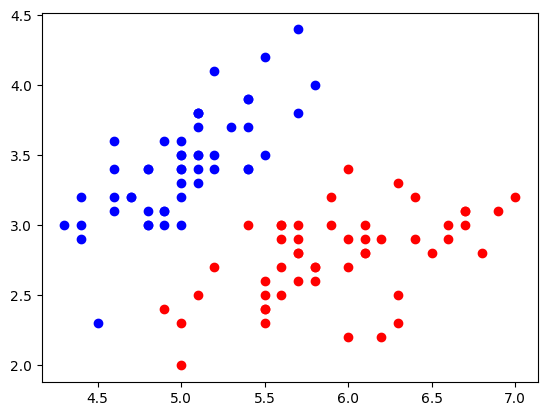

In [19]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color = 'blue')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color = 'red')

In [22]:
X = df.drop(['target', 'target_name'], axis = 'columns')
y = df.target

In [33]:
from sklearn.model_selection import train_test_split, cross_val_score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
model = KNeighborsClassifier()

In [30]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
model.score(X_test, y_test)

0.9555555555555556

In [35]:
cross_val_score(KNeighborsClassifier(), X_train, y_train, cv = 3)

array([0.97142857, 1.        , 1.        ])

In [56]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 12,  1],
       [ 0,  1, 18]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

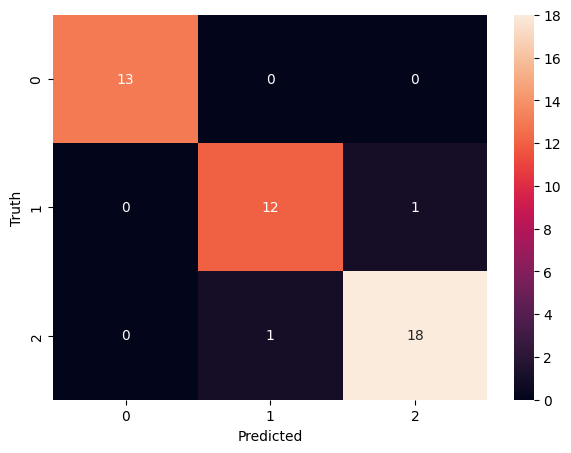

In [55]:
#Visualize Confusion Matrix by plt + sn librabries
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      0.92      0.92        13
           2       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

